<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/")

In [36]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [37]:
data.dtypes

Month            object
AirPassengers     int64
dtype: object

In [38]:
data['Month'] = pd.DatetimeIndex(data['Month'])# Convert Object to time in dataframe
data.head()

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          144 non-null    datetime64[ns]
 1   AirPassengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [40]:
data.set_index('Month')

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          144 non-null    datetime64[ns]
 1   AirPassengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<Axes: xlabel='Month'>

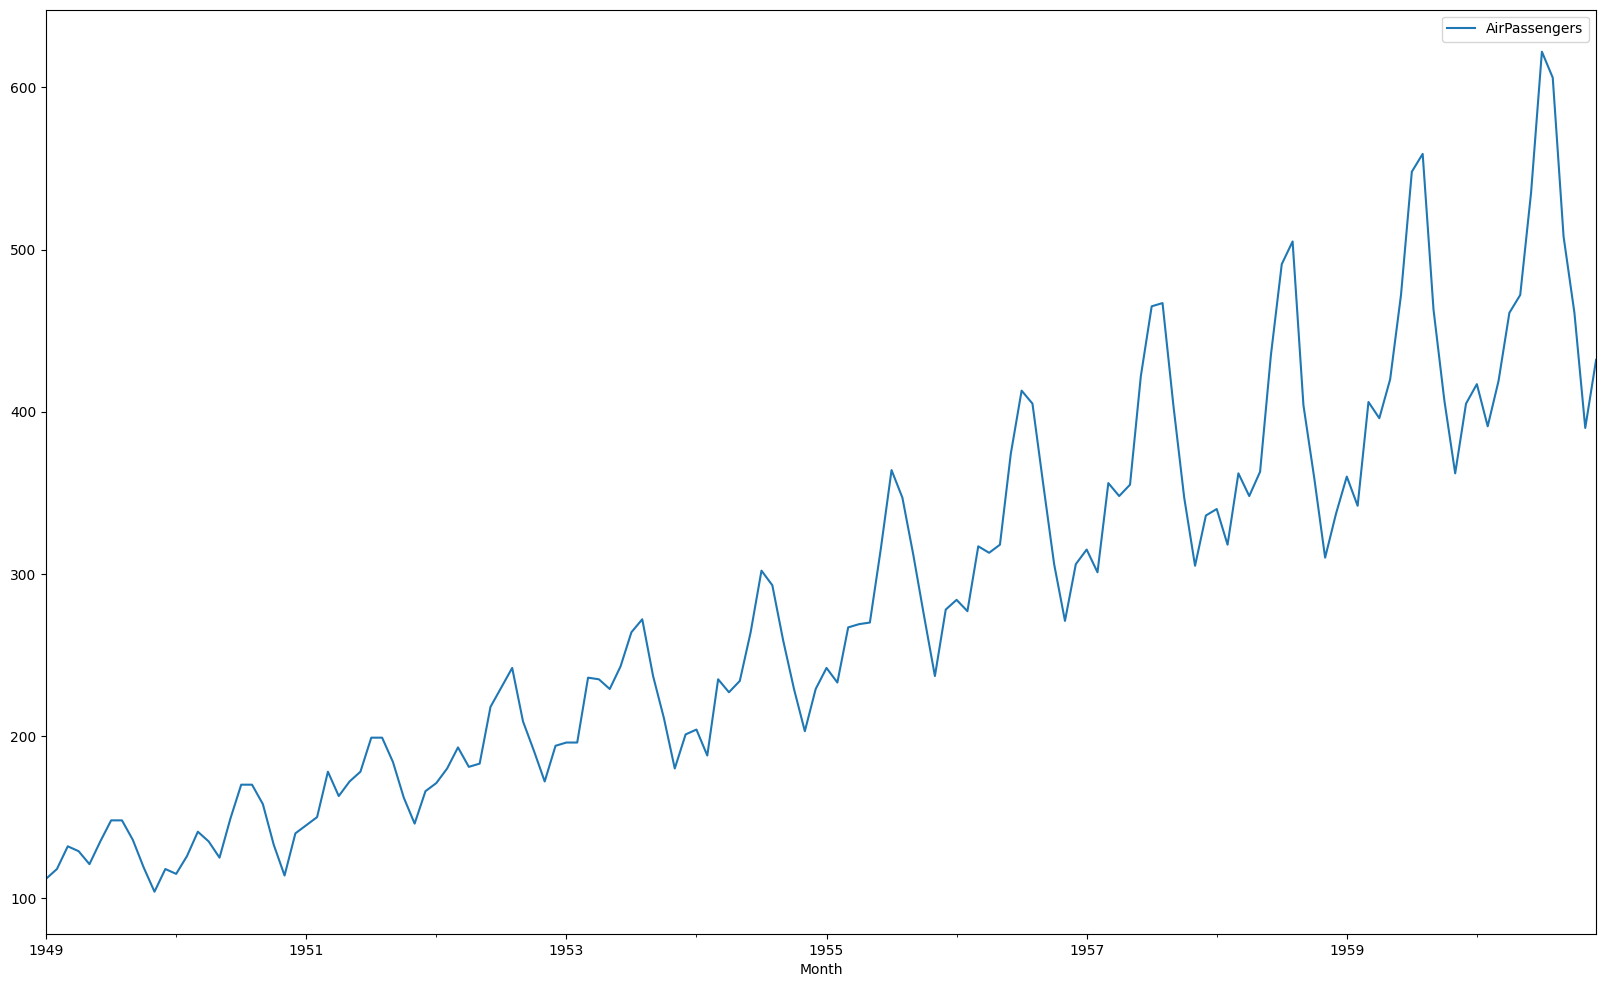

In [42]:
data.set_index('Month').plot(figsize=(20, 12))# the best way for plotting

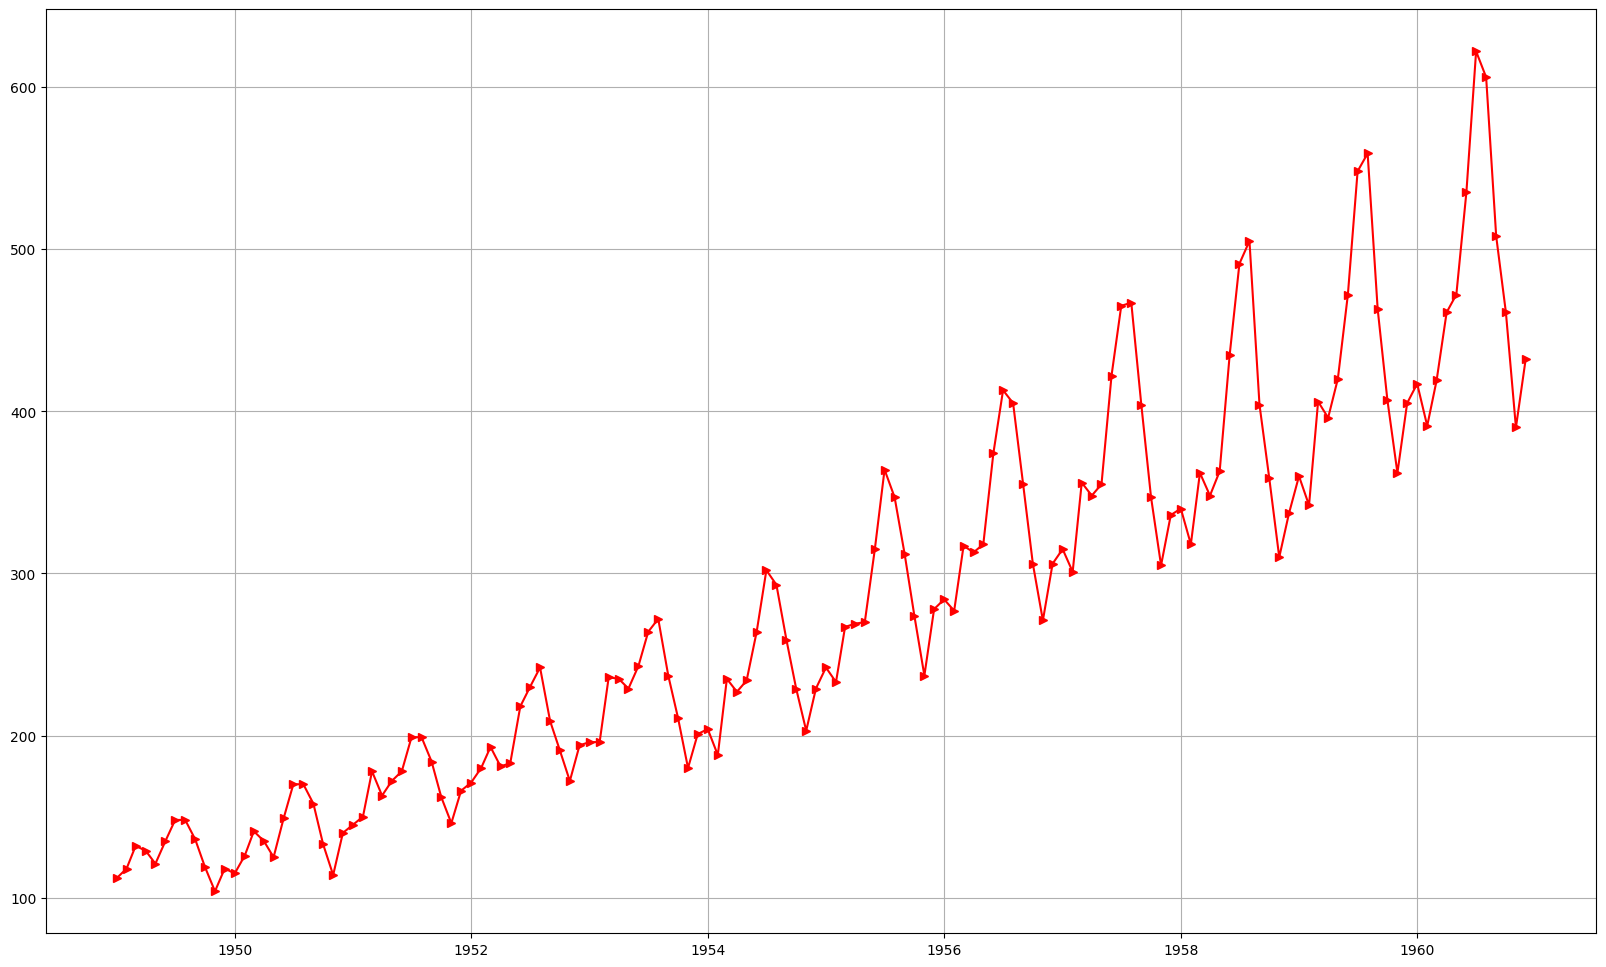

In [43]:
plt.figure(figsize=(20, 12))
plt.plot(data['Month'], data['AirPassengers'], 'r>-')
plt.grid()

In [44]:
data1949=data[(data['Month']<='1949-12-01') ]

In [45]:
data1949_max_passenger=data1949['AirPassengers'].min()

In [46]:
data1949_max_passenger

104

In [47]:
data1949_max_passenger_date=data1949[data1949['AirPassengers']==data1949_max_passenger]

In [48]:
data1949_max_passenger_date

,Month,AirPassengers
10,1949-11-01,104


In [50]:
p = Prophet()

In [53]:
data = data.rename(columns={# In prophet the feature  column is ds and the target column is y
    'Month': 'ds',
    'AirPassengers': 'y'
})
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [51]:
data.tail()

,Month,AirPassengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [54]:
p.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcq_0r0m5/itrbgjjn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcq_0r0m5/0975i6v5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34091', 'data', 'file=/tmp/tmpcq_0r0m5/itrbgjjn.json', 'init=/tmp/tmpcq_0r0m5/0975i6v5.json', 'output', 'file=/tmp/tmpcq_0r0m5/prophet_model6fk0vya_/prophet_model-20230814134137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [55]:
future = p.make_future_dataframe(periods=18, freq='MS')# the previous data has 144 rows this period include 36 month and overall is 144+36=180 rows
future# Infact the new month start from 1361/01/01 to 1363/12/01 with index 179

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
157,1962-02-01
158,1962-03-01
159,1962-04-01
160,1962-05-01


In [56]:
data

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [57]:
forecast = p.predict(future)

In [58]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.398252,58.329672,115.904889,107.398252,107.398252,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,0.0,0.0,0.0,86.004944
1,1949-02-01,109.544420,49.996099,107.730215,109.544420,109.544420,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,0.0,0.0,0.0,79.483800
2,1949-03-01,111.482895,80.859989,138.374901,111.482895,111.482895,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,0.0,0.0,0.0,111.013077
3,1949-04-01,113.629063,76.932945,136.425280,113.629063,113.629063,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,0.0,0.0,0.0,108.711340
4,1949-05-01,115.706000,82.890168,139.609489,115.706000,115.706000,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,0.0,0.0,0.0,112.087749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1962-02-01,527.589767,468.480584,524.089227,526.840124,528.330647,-31.659408,-31.659408,-31.659408,-31.659408,-31.659408,-31.659408,0.0,0.0,0.0,495.930359
158,1962-03-01,530.413106,502.506181,559.098371,529.582590,531.237851,1.149357,1.149357,1.149357,1.149357,1.149357,1.149357,0.0,0.0,0.0,531.562463
159,1962-04-01,533.538946,499.201255,555.551419,532.607669,534.453269,-5.865952,-5.865952,-5.865952,-5.865952,-5.865952,-5.865952,0.0,0.0,0.0,527.672994
160,1962-05-01,536.563952,504.559493,562.897274,535.536605,537.583818,-2.804194,-2.804194,-2.804194,-2.804194,-2.804194,-2.804194,0.0,0.0,0.0,533.759759


In [64]:
data_predicted=forecast.iloc[144:,:]

In [65]:
data_predicted['yhat']

144    466.266376
145    460.724903
146    493.139045
147    491.816980
148    496.141458
149    537.250926
150    576.817218
151    577.239032
152    528.679410
153    493.518349
154    459.662647
155    489.023969
156    502.040696
157    495.930359
158    531.562463
159    527.672994
160    533.759759
161    573.193785
Name: yhat, dtype: float64

In [63]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

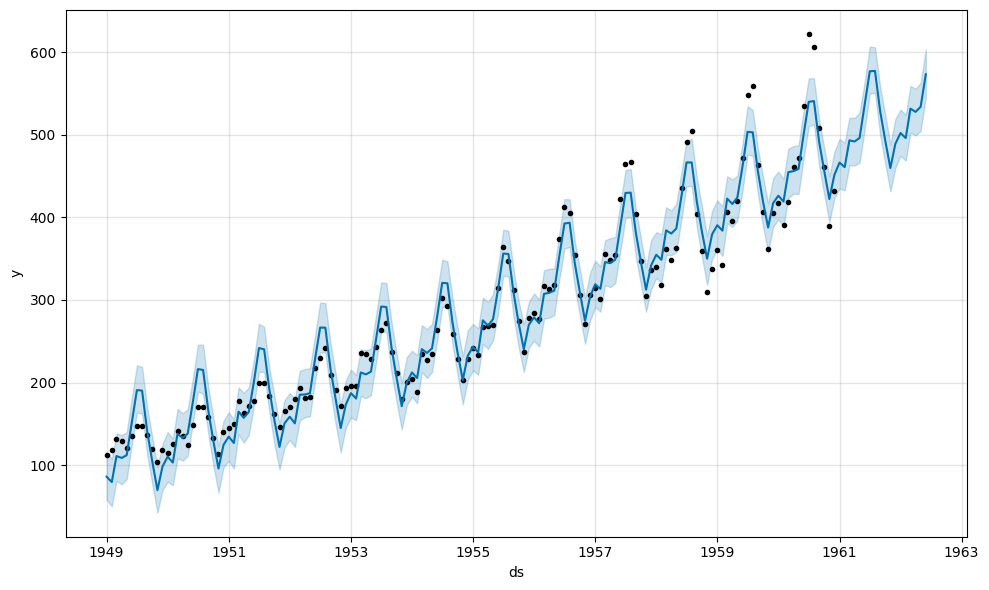

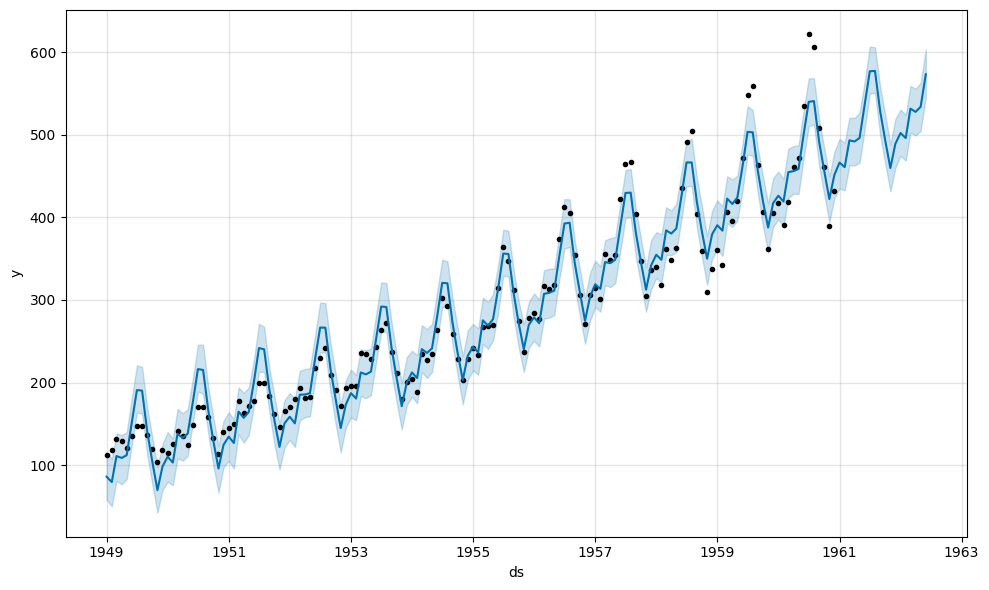

In [66]:
p.plot(forecast, uncertainty=True)